In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score ,root_mean_squared_error 

In [2]:
df=pd.read_csv('tips (data for regression problem) (2).csv')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape


(244, 7)

In [5]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
#split the feature and target variable 
X=df.drop(columns ='tip' ,axis=1)
y=df.tip

In [7]:
X

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3
240,27.18,Female,Yes,Sat,Dinner,2
241,22.67,Male,Yes,Sat,Dinner,2
242,17.82,Male,No,Sat,Dinner,2


In [8]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [65]:
 print(f"correlation = :{X['total_bill'].corr(y)}")
 print(f"correlation = :{X['size'].corr(y)}")

correlation = :0.6757341092113645
correlation = :0.4892987752303579


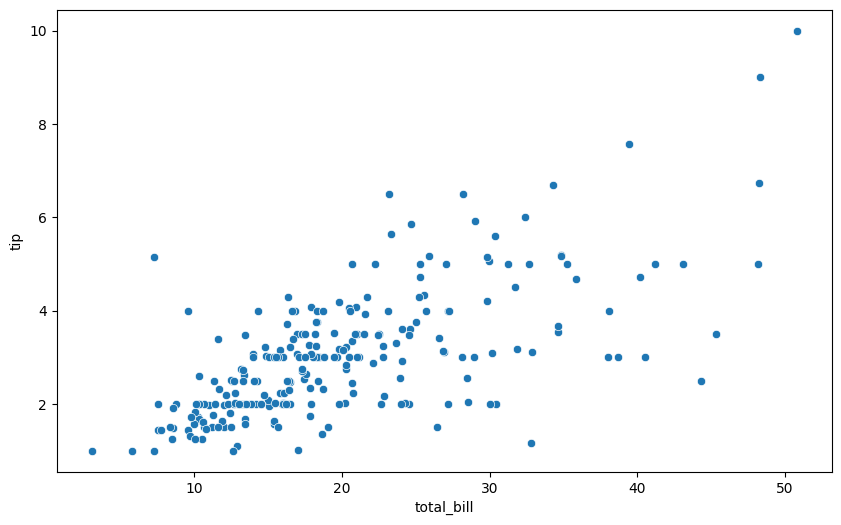

<Figure size 640x480 with 0 Axes>

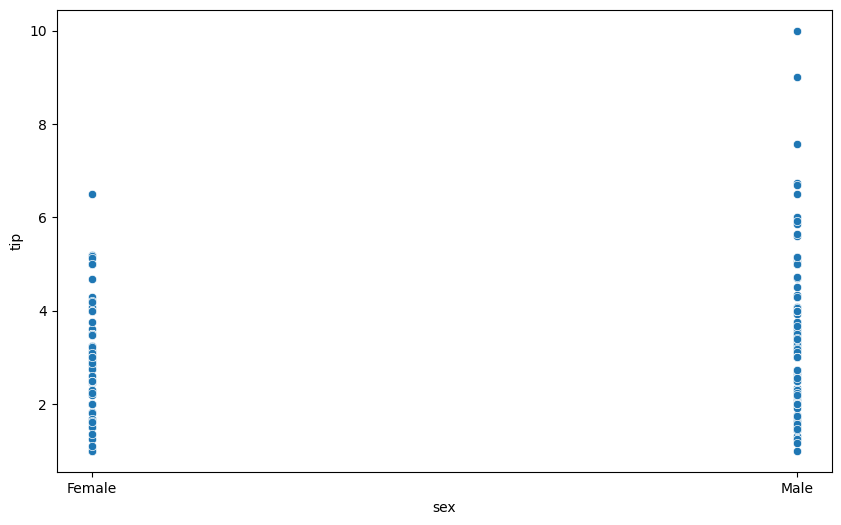

<Figure size 640x480 with 0 Axes>

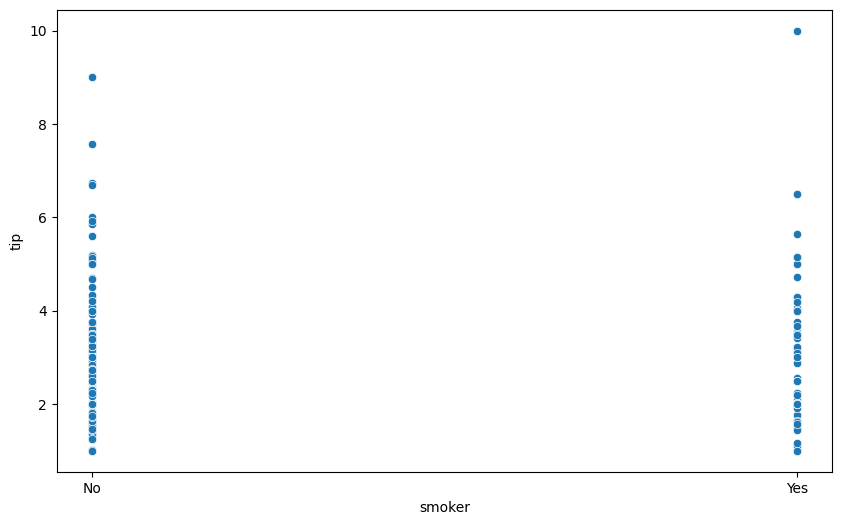

<Figure size 640x480 with 0 Axes>

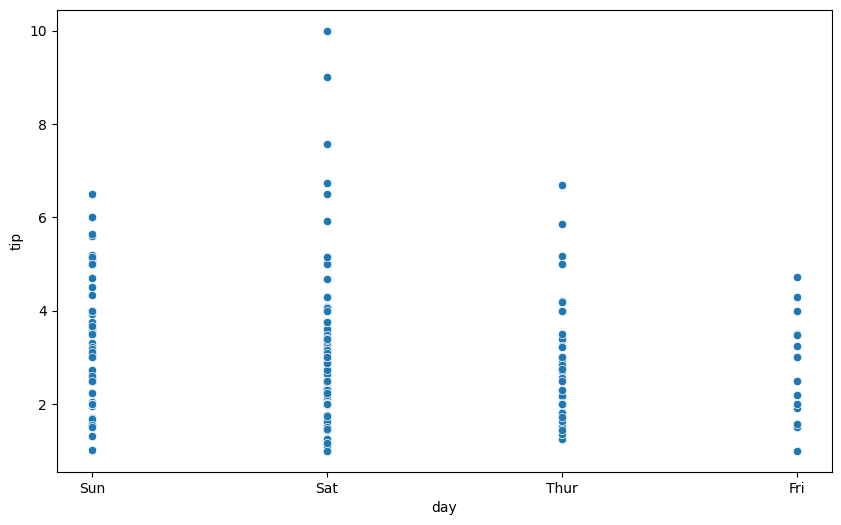

<Figure size 640x480 with 0 Axes>

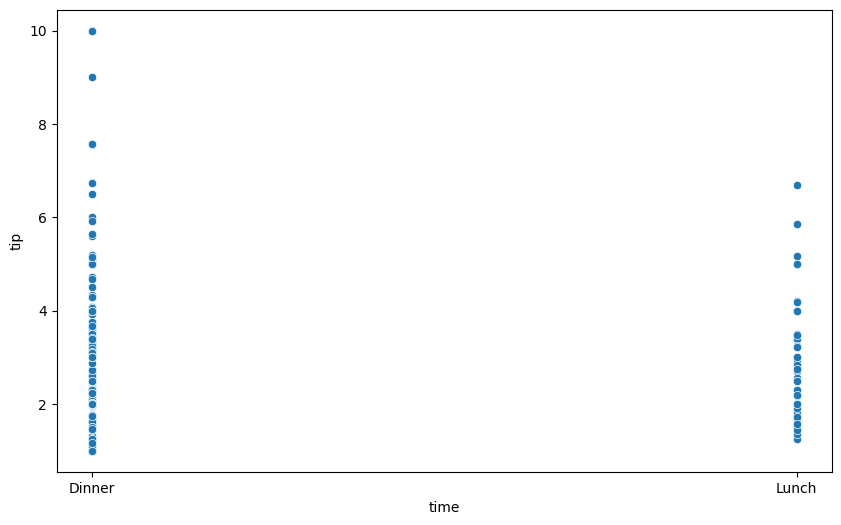

<Figure size 640x480 with 0 Axes>

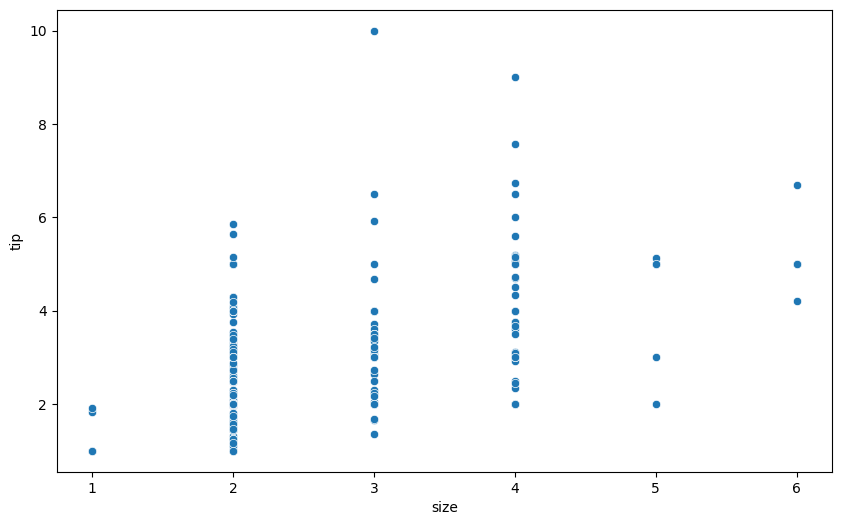

<Figure size 640x480 with 0 Axes>

In [9]:


for i in range(6):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=X.iloc[:,i], y='tip', data=df)
    plt.xlabel(X.columns[i])
    plt.ylabel('tip')
    plt.show()
    plt.tight_layout()    
    
    
    


1)there is a linear relation ship between tip and total bill
2)male customers give more tip than female customers 
3)on friday low amount of tip are recieved
4)tip amount is more at dinner than lunch 

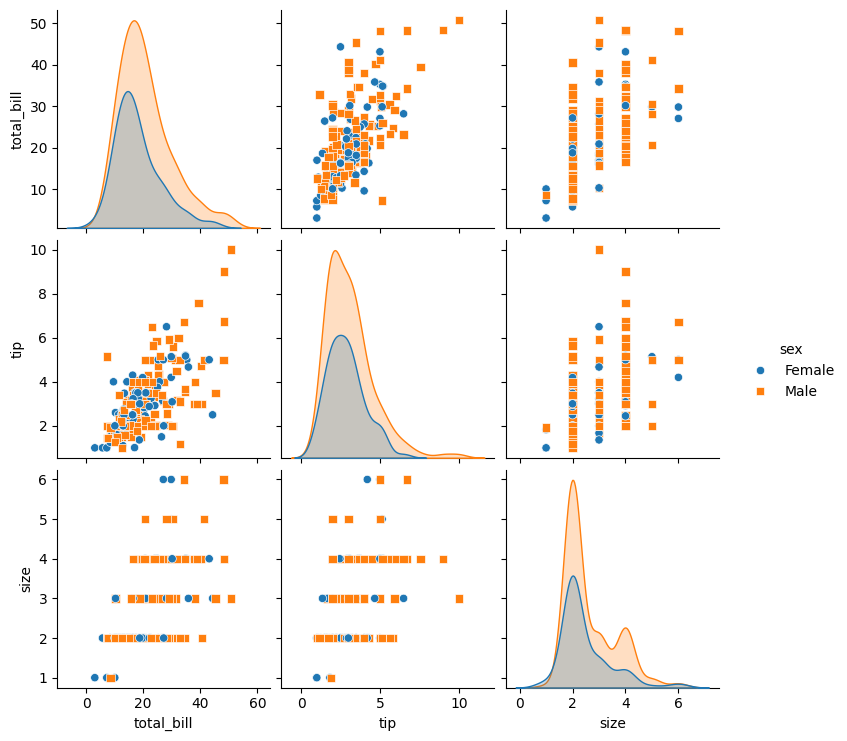

In [66]:
sns.pairplot(df,hue='sex', markers=["o", "s"])

<Axes: >

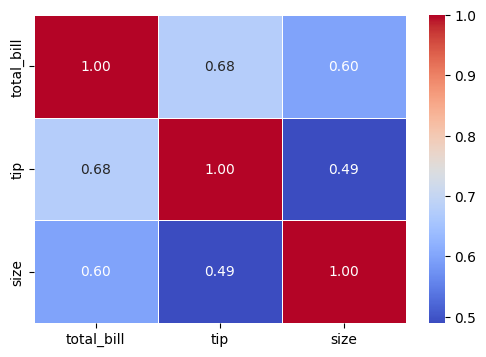

In [11]:
subset_data = df[['total_bill', 'tip', 'size']]
correlation_matrix = subset_data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


In [12]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()
X['sex']=label_encoder.fit_transform(X['sex'])
X['smoker']=label_encoder.fit_transform(X['smoker'])
X['day']=label_encoder.fit_transform(X['day'])
X['time']=label_encoder.fit_transform(X['time'])

In [17]:
# Add a constant to the independent variables (for the intercept in the model)
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, X).fit()

# Perform the Rainbow Test
rainbow_test_stat, rainbow_test_p_value = linear_rainbow(model)
print(f"rainbow_test_stat:{rainbow_test_stat}")
print(f"rainbow_test_p_value:{rainbow_test_p_value}")

rainbow_test_stat:1.2036274510126599
rainbow_test_p_value:0.15798464222013184


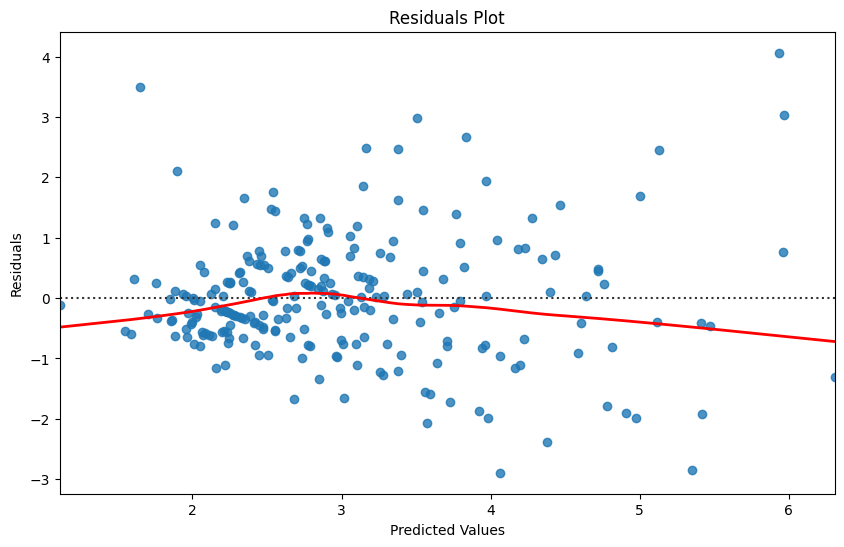

In [18]:
y_pred = model.predict(X)
residuals = y - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

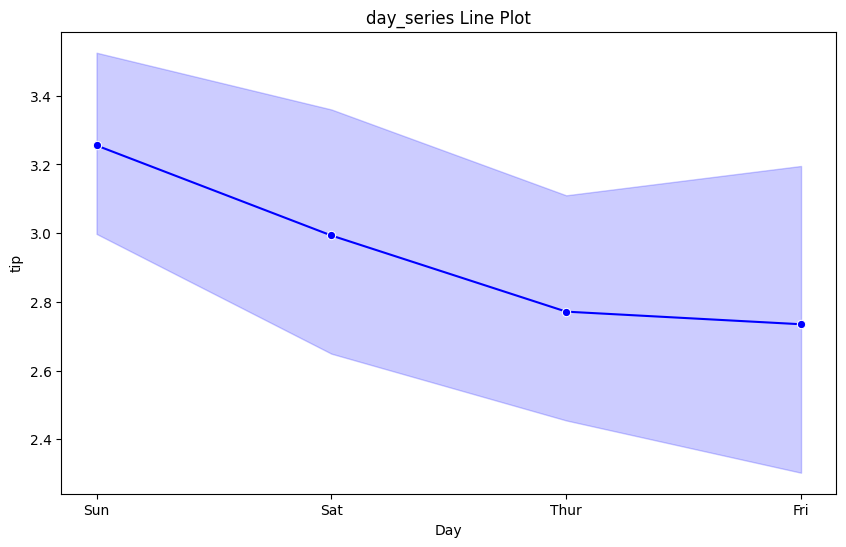

In [20]:
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.lineplot(x='day', y='tip', data=df, marker='o', color='b')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('tip')
plt.title('day_series Line Plot')
plt.show()

1)we can see the decreasing trend of tip corresponding sunday to friday
2)variance of amount of tip is high on friday and low on sunday


In [21]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,True,False,True,False,False,False,True,False,True,False
1,10.34,1.66,3,False,True,True,False,False,False,True,False,True,False
2,21.01,3.50,3,False,True,True,False,False,False,True,False,True,False
3,23.68,3.31,2,False,True,True,False,False,False,True,False,True,False
4,24.59,3.61,4,True,False,True,False,False,False,True,False,True,False


In [25]:
X=df_dummies.drop(columns ='tip' ,axis=1)
y=df_dummies['tip']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluations
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))
print('Linear Regression mse:', mean_squared_error(y_test, y_pred_linear))
print('Linear Regression rmse:', root_mean_squared_error(y_test, y_pred_linear))

Linear Regression R2: 0.43730181943482527
Linear Regression mse: 0.7033566017436101
Linear Regression rmse: 0.8386635807900628


R² = 0.437: This means the model explains 43.7% of the variance in the data.
MSE = .703: The average squared error between actual and predicted values is .703.
RMSE = .839: On average, the predictions are off by about .839 units from the actual values.


In [91]:
ridge_reg = Ridge(alpha=100)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluations
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))
print('Ridge Regression mse:', mean_squared_error(y_test, y_pred_ridge))
print('Ridge Regression rmse:', root_mean_squared_error(y_test, y_pred_ridge))

Ridge Regression R2: 0.4948076485243508
Ridge Regression mse: 0.631475963195548
Ridge Regression rmse: 0.7946546188096738


In [99]:
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))
print('Lasso Regression mse:', mean_squared_error(y_test, y_pred_lasso))
print('Lasso Regression rmse:', root_mean_squared_error(y_test, y_pred_lasso))

Lasso Regression R2: 0.5467115210170849
Lasso Regression mse: 0.5665976098709371
Lasso Regression rmse: 0.7527267830168773


In [100]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))
print('Decision Tree  mse:', mean_squared_error(y_test, y_pred_tree))
print('Decision Tree rmse:', root_mean_squared_error(y_test, y_pred_tree))

Decision Tree R2: 0.08468922169711046
Decision Tree  mse: 1.1441122448979593
Decision Tree rmse: 1.0696318267974076


In [31]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))
print('Random Forest  mse:', mean_squared_error(y_test, y_pred_forest))
print('Random Forest rmse:', root_mean_squared_error(y_test, y_pred_forest))

Random Forest R2: 0.2928026562807994
Random Forest  mse: 0.8839764151020422
Random Forest rmse: 0.9402001994798992


In [32]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Predictions
y_pred_svr = svr.predict(X_test)

# Evaluation
print('svr R2:', r2_score(y_test, y_pred_svr))
print('svr  mse:', mean_squared_error(y_test, y_pred_svr))
print('svr rmse:', root_mean_squared_error(y_test, y_pred_svr))

svr R2: 0.4774229251981983
svr  mse: 0.6532063691987343
svr rmse: 0.8082118343594916


In [33]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))
print('KNN Regression mse:', mean_squared_error(y_test, y_pred_knn))
print('KNN Regression rmse:', root_mean_squared_error(y_test, y_pred_knn))

KNN Regression R2: 0.30069247534937227
KNN Regression mse: 0.874114367346939
KNN Regression rmse: 0.9349408362816007


In [103]:
def residual_plot(y_test , y_pred , model) :
   
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})

# Add labels and title
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot for {model}')
    plt.show()

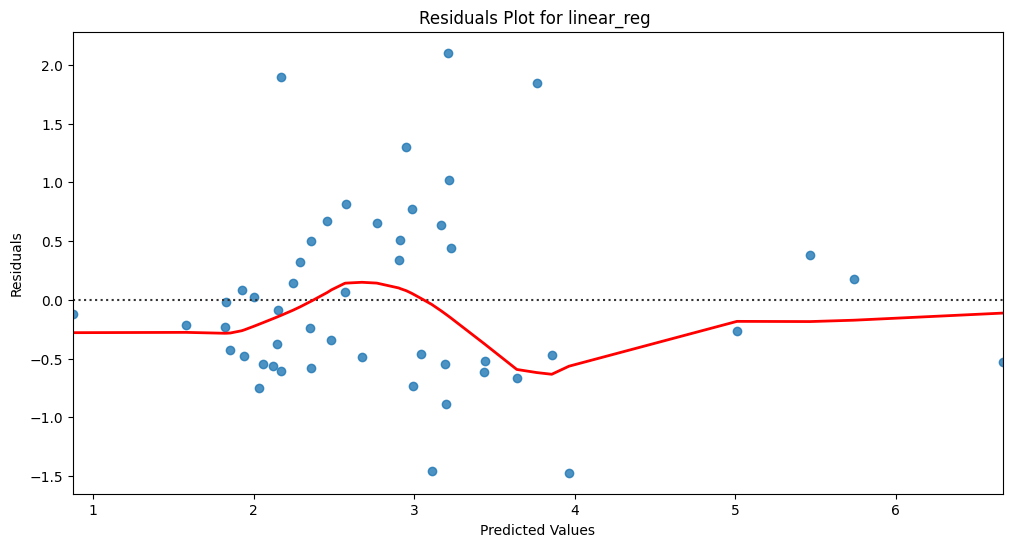

In [104]:
y_pred_linear = linear_reg.predict(X_test)
residual_plot(y_test ,y_pred_linear  , 'linear_reg ') 

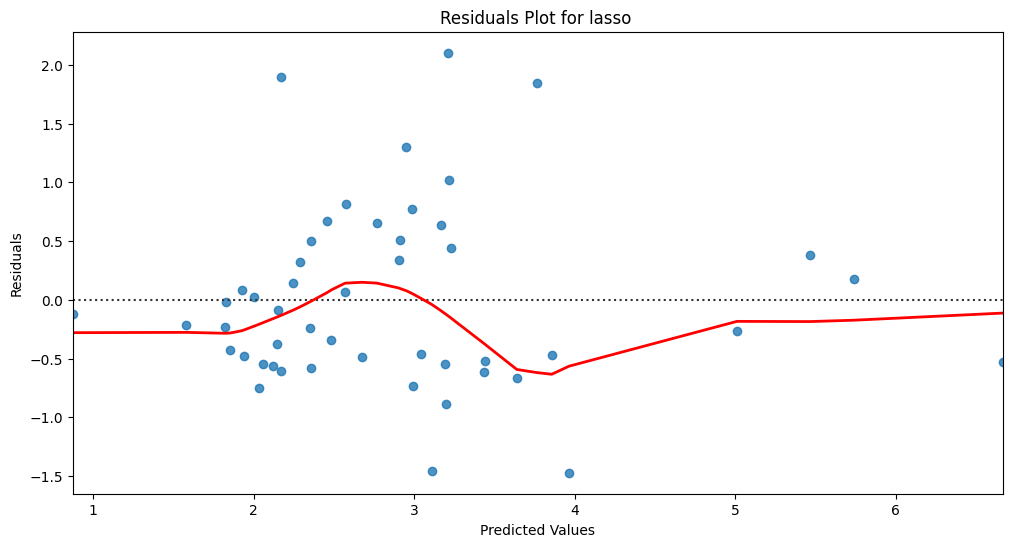

In [105]:
y_pred_lasso = lasso_reg.predict(X_test)
residual_plot(y_test ,y_pred_linear  , 'lasso ') 

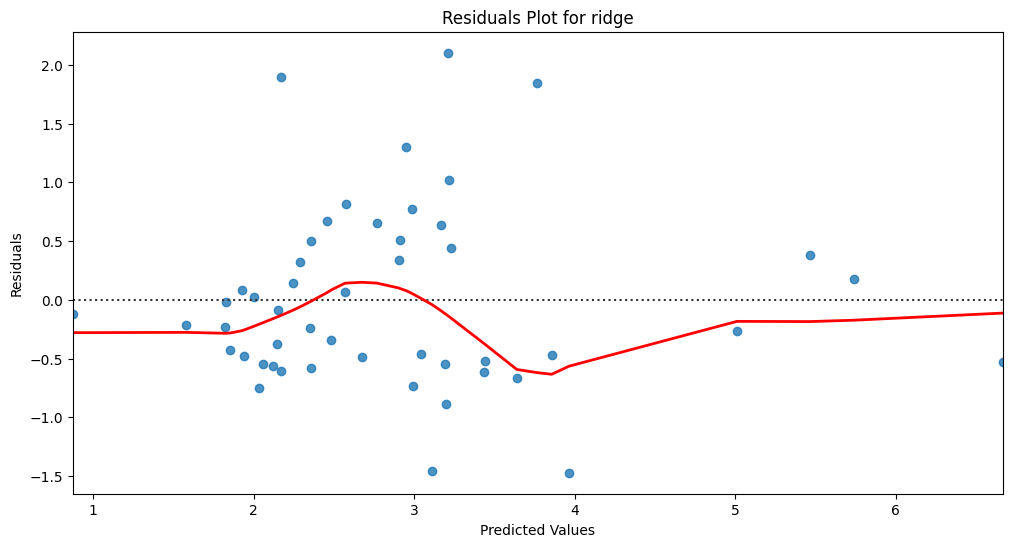

In [106]:
y_pred_ridge = ridge_reg.predict(X_test)
residual_plot(y_test ,y_pred_linear  , 'ridge')

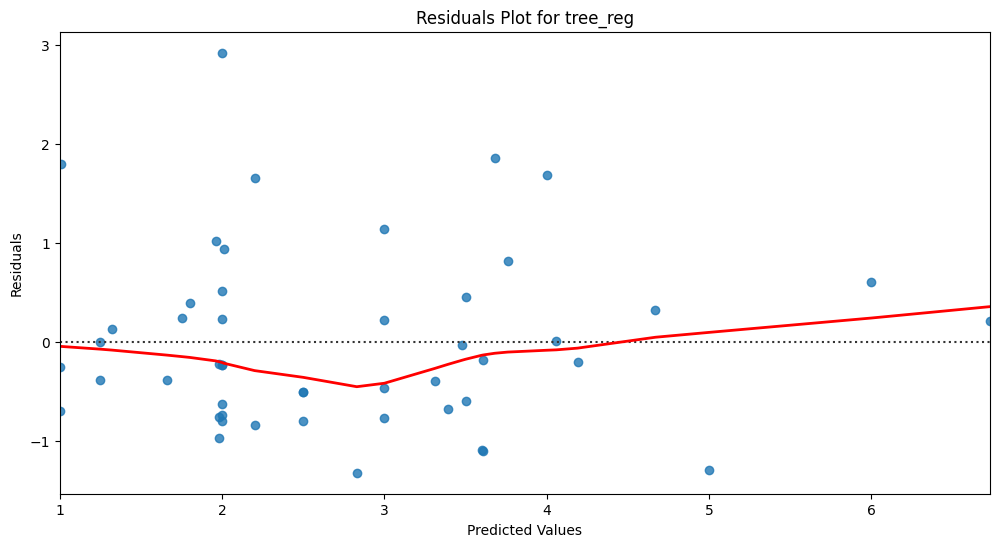

In [107]:
y_pred_tree = tree_reg.predict(X_test)
residual_plot(y_test ,y_pred_tree  , 'tree_reg')

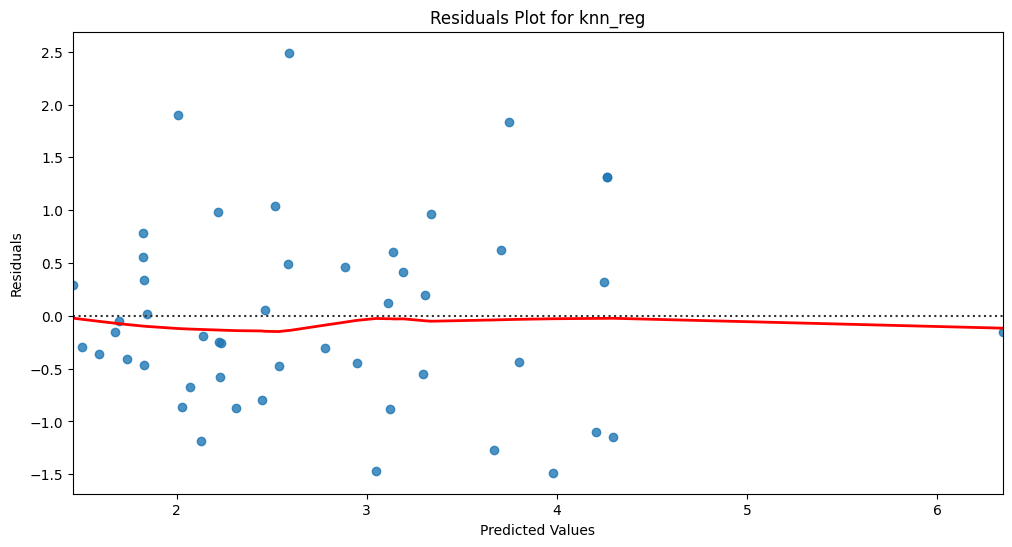

In [108]:
y_pred_knn = knn_reg.predict(X_test)
residual_plot(y_test ,y_pred_knn  , 'knn_reg')

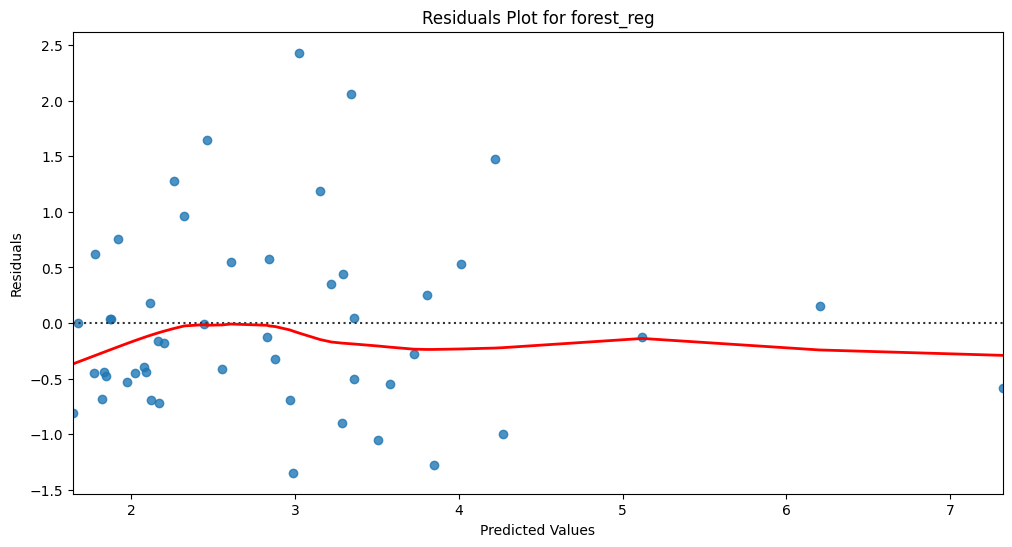

In [109]:
y_pred_forest = forest_reg.predict(X_test)
residual_plot(y_test ,y_pred_forest  , 'forest_reg')

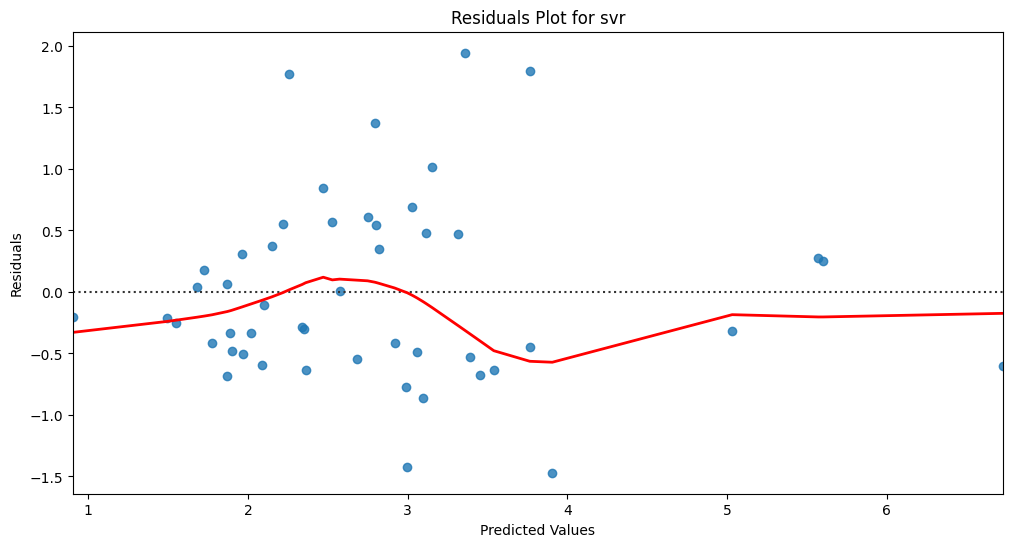

In [110]:
y_pred_svr = svr.predict(X_test)
residual_plot(y_test ,y_pred_svr  , 'svr')

conclusion
1) the business should target their best services to customer on the sunday and increase the quality of survices on friday  to make the tip rate higher
2) the business should focus on the lunch time to increase the tip rate
3) tables with higher numeber of people and lower number of people should be given hihgher priority so that they tend to give more tip
4) the business should pay the attention on totalbill amount because it has significant correlation with the tip amount